# Autoencoder Analysis

Now that our autoencoder is trained, we can start to investigate how it is representing images in the latent space. 

We will then see how **variational autoencoders** are a natural extension that fixes the issues faced by **autoencoders**.

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])


## Load the data

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Load the model architecture

In [4]:
AE = load_model(Autoencoder, RUN_FOLDER)

W0116 16:50:12.626200  2792 deprecation_wrapper.py:119] From c:\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0116 16:50:12.646192  2792 deprecation_wrapper.py:119] From c:\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0116 16:50:12.665098  2792 deprecation_wrapper.py:119] From c:\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0116 16:50:13.044084  2792 deprecation_wrapper.py:119] From c:\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0116 16:50:13.046078  2792 deprecation_

## reconstructing original paintings

In **Figure 2** we can see examples of other original paintings (top row), the coordinates of the point on the wall given by Mr. N. Coder, and the reconstructed paintings produced by Mr. D. Coder (bottom row).

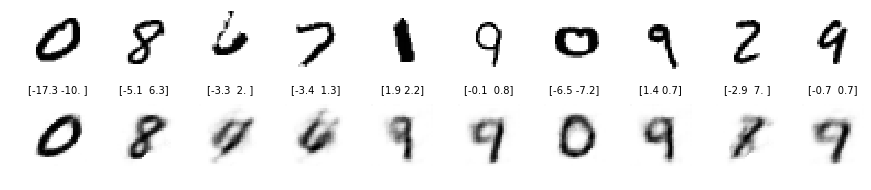

In [5]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


**Figure 2**: Examples of reconstructed paintings.

## Mr N. Coder's wall

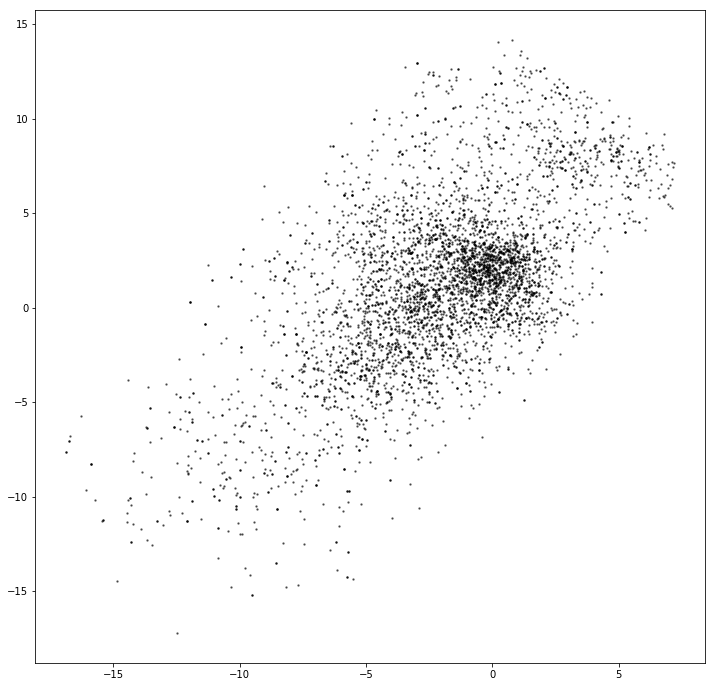

In [6]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

**Figure 1**: The wall at the art exhibition.

### The new generated art exhibition

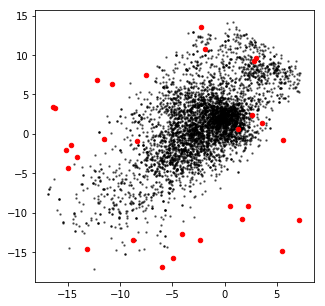

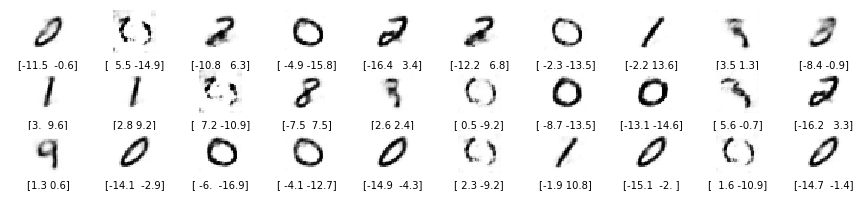

In [7]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

**Figure 3**: The new generative art exhibition. 

Some of the exhibits and corresponding markers (indicated by the red circles) are displayed in Figure 3. 

As we can see, the plan was not a great success. The overall variety is poor and some pieces of artwork do not really resemble single-digit numbers.

---

Let us take a set of new images that the model has not seen, pass them through the encoder, and plot the 2D representations in a scatter plot. 

* In fact, we have already seen this plot: it’s just Mr. N. Coder’s wall from **Figure 1**. 

* Coloring this plot by digit produces the chart in **Figure 8**. It’s worth noting that even though the digit labels were never shown to the model during training, the autoencoder has naturally grouped digits that look alike into the same part of the latent space.

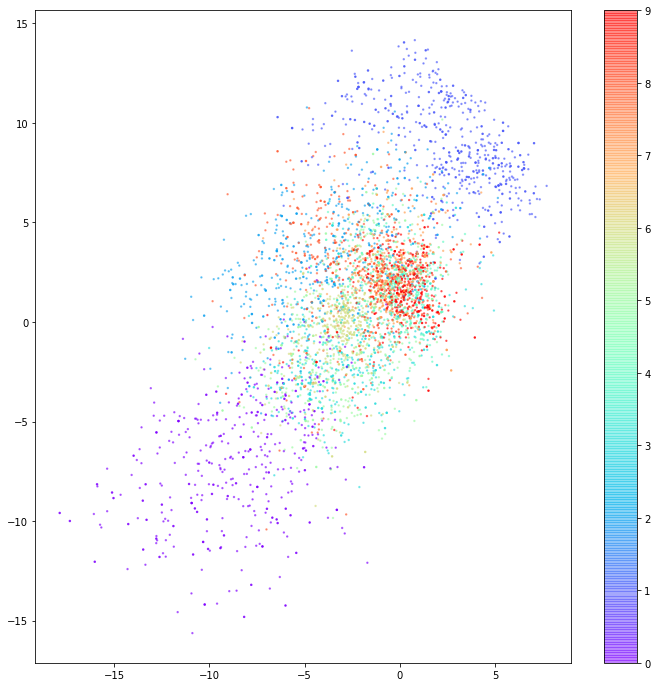

In [8]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

**Figure 8**: Plot of the latent space, colored by digit.

There are a few interesting points to note (see Figure 1):
1. The plot is not symmetrical about the point (0, 0), or bounded. 
    * For example, there are far more points with negative y-axis values than positive, and some points even extend to a y-axis value of < –30.


2. Some digits are represented over a very small area and others over a much larger area.


3. There are large gaps between colors containing few points.

Remember, our goal is to be able to choose a random point in the latent space, pass this through the decoder, and obtain an image of a digit that looks real. 

If we do this multiple times, we would also ideally like to get a roughly equal mixture of different kinds of digit (i.e., it shouldn’t always produce the same digit).

---
**Point 1** explains why it’s not obvious how we should even go about choosing a random point in the latent space, since the distribution of these points is undefined. 
* Technically, we would be justified in choosing any point in the 2D plane! 
* It’s not even guaranteed that points will be centered around (0,0). 
* This makes sampling from our latent space extremely problematic.


**Point 2** explains the lack of diversity in the generated images. Ideally, we’d like to obtain a roughly equal spread of digits when sampling randomly from our latent space. 
* However, with an autoencoder this is not guaranteed. For example, the area of 1’s is far bigger than the area for 8’s, so when we pick points randomly in the space, we’re more likely to sample something that decodes to look like a 1 than an 8.

**Point 3** explains why some generated images are poorly formed. 
* In **Figure 9** we can see three points in the latent space and their decoded images, none of which are particularly well formed.

<img src="./images/figure_9.png" width="550" border="1">

**Figure 9**: Some poorly generated images.

----
Partly, this is because of the large spaces at the edge of the domain where there are few points—the autoencoder has no reason to ensure that points here are decoded to legible digits as very few images are encoded here. 

However, more worryingly, even points that are right in the middle of the domain may not be decoded into wellformed images. 

This is because the autoencoder is not forced to ensure that the space is continuous. 

For example, even though the point (2, –2) might be decoded to give a satisfactory image of a 4, there is no mechanism in place to ensure that the point (2.1, –2.1) also produces a satisfactory 4.

----
In 2D this issue is subtle; the autoencoder only has a small number of dimensions to work with, so naturally it has to squash digit groups together, resulting in the space between digit groups being relatively small. 

However, as we start to use more dimensions in the latent space to generate more complex images, such as faces, this problem becomes even more apparent. 

If we give the autoencoder free rein in how it uses the latent space to encode images, there will be huge gaps between groups of similar points with no incentive for the space between to generate well-formed images.

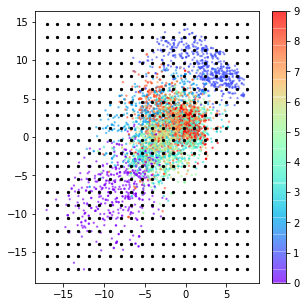

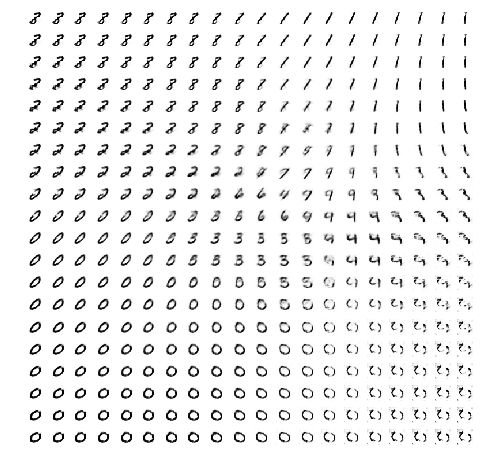

In [9]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)


plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

END.